# Notebook to check which districts are affected at landfall

In [2]:
%load_ext jupyter_black
%load_ext autoreload
%autoreload 2

In [3]:
import os
import pandas as pd
from pathlib import Path
import warnings
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import numpy as np
import matplotlib.ticker as mticker
import geopandas as gpd
from src.datasources import rsmc, helpers, codab
from src import constants

c:\Users\pauni\Desktop\Work\OCHA\GitHub\ds-aa-moz-cyclones\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
warnings.filterwarnings("ignore")
AA_DATA_DIR = Path(os.getenv("AA_DATA_DIR"))

In [5]:
landfall_df = pd.read_csv(
    AA_DATA_DIR / "public" / "processed" / "moz" / "landfall_time_location.csv"
)

In [6]:
adm2_path = (
    AA_DATA_DIR
    / "public"
    / "raw"
    / "moz"
    / "cod_ab"
    / "moz_admbnda_adm2_ine_20190607.shp"
)

gdf_adm2 = gpd.read_file(adm2_path)
adm1_path = (
    AA_DATA_DIR
    / "public"
    / "raw"
    / "moz"
    / "cod_ab"
    / "moz_admbnda_adm1_ine_20190607.shp"
)

gdf_adm1 = gpd.read_file(adm1_path)
gdf_adm1_sel = gdf_adm1[gdf_adm1["ADM1_PT"].isin(constants.ADMS)]

In [7]:
df_rsmc = pd.read_parquet(
    rsmc.DATA_DIR
    / "private"
    / "processed"
    / "moz"
    / "rsmc"
    / "rsmc_forecasts_interp_distances_withradius.parquet"
)
df_rsmc_lt0 = df_rsmc[df_rsmc["lt_hour"] == 0]

In [8]:
df_rsmc_lt0[df_rsmc_lt0["name"] == "DINEO"]

,valid_time,lt_hour,latitude,longitude,max_wind_kt,radius_max_wind_nm,season,name,numberseason,issue_time,MZ03_distance_km,MZ07_distance_km,MZ09_distance_km,MZ11_distance_km
228718,2017-02-13 00:00:00+00:00,0.0,-21.30,40.70,25.0,15,20162017,DINEO,0520162017,2017-02-13 00:00:00+00:00,580.007050,546.372038,583.809673,536.836681
228935,2017-02-13 06:00:00+00:00,0.0,-21.47,39.87,25.0,15,20162017,DINEO,0520162017,2017-02-13 06:00:00+00:00,486.876665,544.524833,516.637426,501.545948
229104,2017-02-13 12:00:00+00:00,0.0,-21.56,39.95,40.0,15,20162017,DINEO,0520162017,2017-02-13 12:00:00+00:00,495.000654,556.545582,530.179966,515.239495
229273,2017-02-13 18:00:00+00:00,0.0,-21.52,39.64,45.0,15,20162017,DINEO,0520162017,2017-02-13 18:00:00+00:00,461.171350,547.259386,499.814279,485.762153
229442,2017-02-14 00:00:00+00:00,0.0,-21.54,39.35,45.0,15,20162017,DINEO,0520162017,2017-02-14 00:00:00+00:00,428.867465,547.329765,475.090082,463.617713
229563,2017-02-14 06:00:00+00:00,0.0,-22.34,38.82,50.0,22,20162017,DINEO,0520162017,2017-02-14 06:00:00+00:00,364.667646,643.849637,443.463591,498.877257
229756,2017-02-14 12:00:00+00:00,0.0,-22.19,38.87,55.0,22,20162017,DINEO,0520162017,2017-02-14 12:00:00+00:00,369.931043,625.541081,442.214917,487.272421
229901,2017-02-14 18:00:00+00:00,0.0,-22.50,38.39,55.0,25,20162017,DINEO,0520162017,2017-02-14 18:00:00+00:00,314.331245,667.389766,407.968612,490.473221
229998,2017-02-15 00:00:00+00:00,0.0,-22.73,37.76,60.0,25,20162017,DINEO,0520162017,2017-02-15 00:00:00+00:00,241.137236,706.801421,362.709127,486.956793
230095,2017-02-15 06:00:00+00:00,0.0,-22.90,37.10,60.0,25,20162017,DINEO,0520162017,2017-02-15 06:00:00+00:00,166.537067,745.869007,321.160212,487.307242


In [9]:
landfall_df.columns

Index(['ISO_TIME', 'SID', 'SEASON', 'NUMBER', 'BASIN', 'SUBBASIN', 'NAME',
       'NATURE', 'LAT', 'LON',
       ...
       'year', 'month', 'day', 'hour', 'min', 'geometry', 'date', 'ADM1_PT',
       'actual_within_land', 'point_location'],
      dtype='object', length=184)

Wind Speed

In [10]:
df_rsmc_lt0["valid_time"] = pd.to_datetime(
    df_rsmc_lt0["valid_time"]
).dt.tz_localize(None)
landfall_df["ISO_TIME"] = pd.to_datetime(landfall_df["ISO_TIME"])

time_window = pd.Timedelta(days=0.25) 

filtered_data = []

for landfall_time in landfall_df["ISO_TIME"]:
    # Define the start and end of the time window
    start_time = landfall_time - time_window
    end_time = landfall_time + time_window

    # Filter df_rsmc for this time window
    filtered = df_rsmc_lt0[
        (df_rsmc_lt0["valid_time"] >= start_time)
        & (df_rsmc_lt0["valid_time"] <= end_time)
    ]

    # Append the filtered data to the list
    filtered_data.append(filtered)

final_filtered_df = pd.concat(filtered_data, ignore_index=True)

In [11]:
final_filtered_df[final_filtered_df["name"] == "IDAI"]

,valid_time,lt_hour,latitude,longitude,max_wind_kt,radius_max_wind_nm,season,name,numberseason,issue_time,MZ03_distance_km,MZ07_distance_km,MZ09_distance_km,MZ11_distance_km
13,2019-03-04 12:00:00,0.0,-17.94,37.15,30.0,15,20182019,IDAI,1120182019,2019-03-04 12:00:00+00:00,421.191449,252.599099,129.871421,9.628806
14,2019-03-14 18:00:00,0.0,-19.81,35.58,90.0,20,20182019,IDAI,1120182019,2019-03-14 18:00:00+00:00,145.051299,522.978457,43.526207,124.193582
15,2019-03-15 00:00:00,0.0,-19.74,34.82,90.0,15,20182019,IDAI,1120182019,2019-03-15 00:00:00+00:00,147.747592,584.957742,0.000000,177.550754


No Buffer

In [12]:
final_filtered_df["radius_max_wind_nm"] = pd.to_numeric(
    final_filtered_df["radius_max_wind_nm"], errors="coerce"
)

final_filtered_df["radius_max_wind_km"] = (
    final_filtered_df["radius_max_wind_nm"] * 1.852
)

storm_gdf_no_buffer = gpd.GeoDataFrame(
    final_filtered_df,
    geometry=gpd.points_from_xy(
        final_filtered_df["longitude"], final_filtered_df["latitude"]
    ),
    crs="EPSG:4326",
)

districts_within_radius_no_buffer = gpd.sjoin(
    gdf_adm2,
    storm_gdf_no_buffer,
    how="inner",
    predicate="intersects",
)

districts_filtered = districts_within_radius_no_buffer[
    districts_within_radius_no_buffer["ADM1_PT"].isin(constants.ADMS)
]

district_count_no_buffer = (
    districts_filtered.groupby(["name", "valid_time", "max_wind_kt"])
    .agg({"ADM2_PT": "nunique"})
    .reset_index()
)

district_count_no_buffer.columns = [
    "name",
    "valid_time",
    "max_wind_kt",
    "district_count",
]  # Rename for clarity

average_districts_no_buffer = district_count_no_buffer["district_count"].mean()

print("District Count by Storm and Time Step (Without Buffer):")
print(district_count_no_buffer)

print(
    f"\nOverall Average Number of Districts Without Buffer: {average_districts_no_buffer:.0f}"
)

District Count by Storm and Time Step (Without Buffer):
       name          valid_time  max_wind_kt  district_count
0       ANA 2022-01-24 12:00:00         40.0               1
1   CHALANE 2020-12-30 06:00:00         45.0               1
2     DANDO 2012-01-16 12:00:00         35.0               1
3   DESMOND 2019-01-22 00:00:00         35.0               1
4     DINEO 2017-02-15 18:00:00         65.0               1
5    ELOISE 2021-01-23 06:00:00         45.0               1
6    FILIPO 2024-03-12 06:00:00         45.0               1
7    FREDDY 2023-03-11 18:00:00         80.0               1
8     GOMBE 2022-03-11 06:00:00         60.0               1
9      IDAI 2019-03-15 00:00:00         90.0               1
10  KENNETH 2019-04-25 18:00:00         85.0               1

Overall Average Number of Districts Without Buffer: 1


With Buffer

In [13]:
final_filtered_df["radius_max_wind_nm"] = pd.to_numeric(
    final_filtered_df["radius_max_wind_nm"], errors="coerce"
)

final_filtered_df["radius_max_wind_km"] = (
    final_filtered_df["radius_max_wind_nm"] * 1.852
)

storm_gdf = gpd.GeoDataFrame(
    final_filtered_df,
    geometry=gpd.points_from_xy(
        final_filtered_df["longitude"], final_filtered_df["latitude"]
    ),
    crs="EPSG:4326",  # Assuming WGS 84
)

storm_gdf["buffer"] = storm_gdf.geometry.buffer(
    storm_gdf["radius_max_wind_km"] / 110.574
    + 0.0001  # Small addition ensures the point stays within the buffer
)

districts_within_radius_all = gpd.sjoin(
    gdf_adm2,
    storm_gdf.set_geometry("buffer"),
    how="inner",
    predicate="intersects",
)

districts_filtered_all = districts_within_radius_all[
    districts_within_radius_all["ADM1_PT"].isin(constants.ADMS)
]

district_count_all = (
    districts_filtered_all.groupby(["name", "valid_time", "max_wind_kt"])
    .agg({"ADM2_PT": "nunique"})
    .reset_index()
)

district_count_all.columns = [
    "name",
    "valid_time",
    "max_wind_kt",
    "district_count",
]

storm_gdf_filtered = storm_gdf[storm_gdf["max_wind_kt"] > 48]

districts_within_radius_filtered = gpd.sjoin(
    gdf_adm2,
    storm_gdf_filtered.set_geometry("buffer"),
    how="inner",
    predicate="intersects",
)

districts_filtered_filtered = districts_within_radius_filtered[
    districts_within_radius_filtered["ADM1_PT"].isin(constants.ADMS)
]

district_count_filtered = (
    districts_filtered_filtered.groupby(["name", "valid_time", "max_wind_kt"])
    .agg({"ADM2_PT": "nunique"})
    .reset_index()
)

district_count_filtered.columns = [
    "name",
    "valid_time",
    "max_wind_kt",
    "district_count",
]

average_districts_all = district_count_all["district_count"].mean()
average_districts_filtered = district_count_filtered["district_count"].mean()

print(
    f"\nOverall Average Number of Districts within Radius (All Wind Speeds): {average_districts_all:.0f}"
)

print(
    f"\nOverall Average Number of Districts within Radius (Wind Speed > 48 knots): {average_districts_filtered:.0f}"
)


Overall Average Number of Districts within Radius (All Wind Speeds): 3

Overall Average Number of Districts within Radius (Wind Speed > 48 knots): 3


In [14]:
district_count_all

,name,valid_time,max_wind_kt,district_count
0,CHALANE,2020-12-30 06:00:00,45.0,4
1,DANDO,2012-01-16 06:00:00,45.0,2
2,DINEO,2017-02-15 18:00:00,65.0,2
3,ELOISE,2021-01-23 00:00:00,80.0,2
4,FILIPO,2024-03-12 00:00:00,55.0,3
5,FILIPO,2024-03-12 06:00:00,45.0,3
6,FREDDY,2023-03-11 18:00:00,80.0,5
7,GOMBE,2022-03-11 00:00:00,90.0,2
8,GOMBE,2022-03-11 06:00:00,60.0,5
9,IDAI,2019-03-04 12:00:00,30.0,5


In [15]:
district_count_filtered

,name,valid_time,max_wind_kt,district_count
0,DINEO,2017-02-15 18:00:00,65.0,2
1,ELOISE,2021-01-23 00:00:00,80.0,2
2,FILIPO,2024-03-12 00:00:00,55.0,3
3,FREDDY,2023-03-11 18:00:00,80.0,5
4,GOMBE,2022-03-11 00:00:00,90.0,2
5,GOMBE,2022-03-11 06:00:00,60.0,5
6,IDAI,2019-03-15 00:00:00,90.0,3
7,KENNETH,2019-04-25 18:00:00,85.0,2


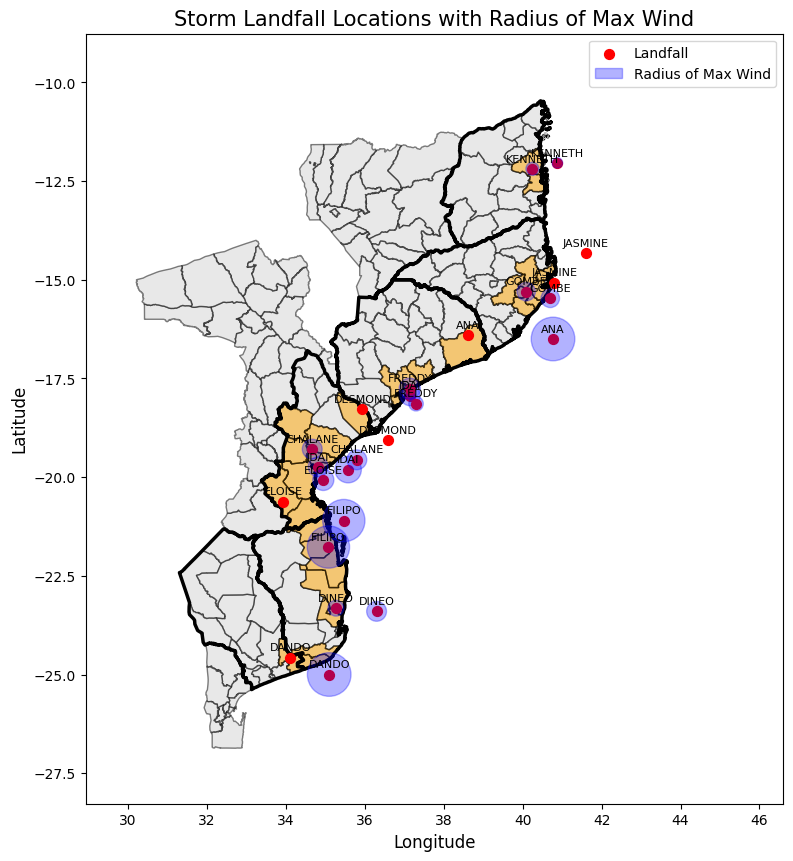

In [16]:
filtered_storm_gdf = storm_gdf[storm_gdf["longitude"] <= 50]

filtered_storm_gdf["buffer"] = filtered_storm_gdf.geometry.buffer(
    filtered_storm_gdf["radius_max_wind_km"] / 110.574 + 0.0001
)

districts_within_buffer = gpd.sjoin(
    gdf_adm2,
    filtered_storm_gdf.set_geometry("buffer"),
    how="inner",
    predicate="intersects",
)

districts_with_landfall = gpd.sjoin(
    gdf_adm2,
    filtered_storm_gdf,
    how="inner",
    predicate="intersects",
)

highlighted_districts = pd.concat(
    [districts_within_buffer, districts_with_landfall]
)["ADM2_PT"].unique()

fig, ax = plt.subplots(figsize=(9, 10))

gdf_adm2.plot(
    ax=ax, color="lightgray", edgecolor="black", alpha=0.5
) 

gdf_adm2[gdf_adm2["ADM2_PT"].isin(highlighted_districts)].plot(
    ax=ax, color="orange", edgecolor="black", alpha=0.5
)

gdf_adm1_sel.plot(
    ax=ax, edgecolor="black", linewidth=2.5, facecolor="none"
) 

for idx, row in filtered_storm_gdf.iterrows():
    radius = row["radius_max_wind_km"] / 110.574  # Convert km to degrees

    # Plot the landfall location
    plt.scatter(
        row["longitude"], 
        row["latitude"],  
        color="red",
        s=50,
        label=(
            "Landfall" if idx == 0 else ""
        ),  
    )

    # Annotate with the cyclone name
    plt.annotate(
        row["name"],  # Cyclone name
        (row["longitude"], row["latitude"]),
        textcoords="offset points",
        xytext=(0, 5),  # Move text slightly above the point
        ha="center",
        fontsize=8,
        color="black",
    )

    # Plot a circle for the radius of max wind in km
    circle = plt.Circle(
        (row["longitude"], row["latitude"]),
        radius,
        color="blue",
        alpha=0.3,
        label=(
            "Radius of Max Wind" if idx == 0 else ""
        ),  # Add label only for the first circle
    )
    ax.add_patch(circle)

# Add labels and title
plt.title("Storm Landfall Locations with Radius of Max Wind", fontsize=15)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)

# Set legend position to bottom right
plt.legend()

# Set equal aspect ratio to ensure circles appear circular
ax.set_aspect("equal", adjustable="datalim")
plt.xlim(
    filtered_storm_gdf["longitude"].min() - 5,
    filtered_storm_gdf["longitude"].max() + 5,
)  # Adjust limits if necessary
plt.ylim(
    filtered_storm_gdf["latitude"].min() - 5,
    filtered_storm_gdf["latitude"].max() + 5,
)  # Adjust limits if necessary

# Display the plot
plt.show()

Rainfall

In [17]:
buffer_distance_degrees = (
    250 / 110.574
)  # Approximate conversion from km to degrees

landfall_gdf = gpd.GeoDataFrame(
    landfall_df,
    geometry=gpd.points_from_xy(landfall_df["LON"], landfall_df["LAT"]),
    crs="EPSG:4326",  # Assuming the original CRS is in WGS84 (EPSG:4326)
)

landfall_gdf["buffer"] = landfall_gdf.geometry.buffer(buffer_distance_degrees)

districts_within_buffer = gpd.sjoin(
    gdf_adm2,
    landfall_gdf.set_geometry("buffer"),
    how="inner",
    predicate="intersects",
)

filtered_districts = districts_within_buffer[
    districts_within_buffer["ADM1_PT_left"].isin(constants.ADMS)
]

district_count_per_landfall = (
    filtered_districts.groupby("NAME")
    .size()
    .reset_index(name="district_count")
)

average_districts = district_count_per_landfall["district_count"].mean()

# Print the average number of districts
print(
    f"Average number of districts within 250 km of landfalls: {average_districts:.0f}"
)

Average number of districts within 250 km of landfalls: 24


In [18]:
district_count_per_landfall

,NAME,district_count
0,ANA,29
1,CHALANE,26
2,DANDO,24
3,DELIWE,21
4,DESMOND,26
5,DINEO,21
6,ELOISE,22
7,FAVIO,21
8,FILIPO,18
9,FREDDY,29


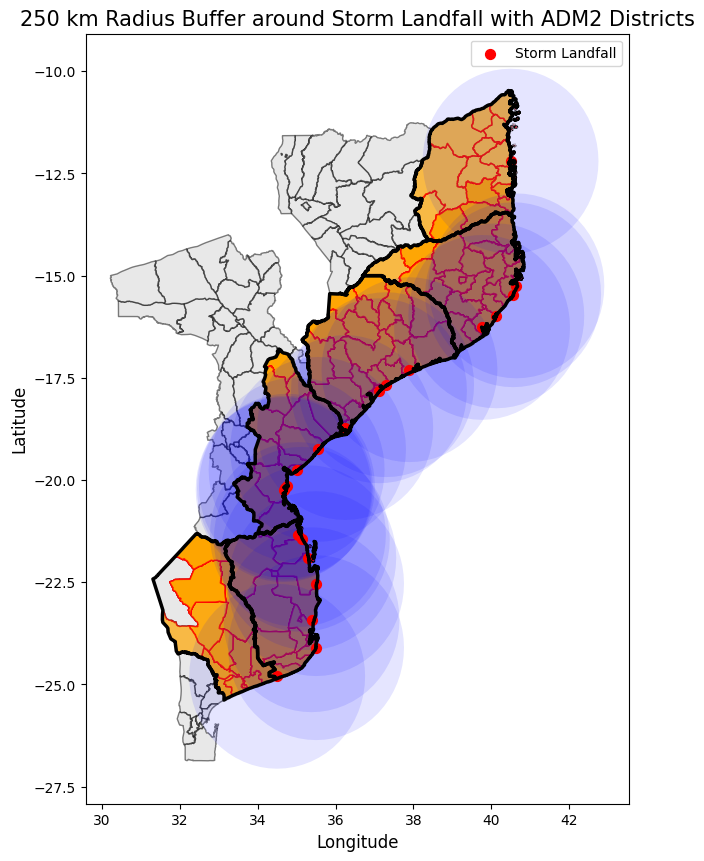

In [19]:
fig, ax = plt.subplots(figsize=(8, 10))

gdf_adm2.plot(ax=ax, color="lightgray", edgecolor="black", alpha=0.5)


# Plot the districts that intersect with the buffer, only those in constants.ADMS
districts_within_buffer[
    districts_within_buffer["ADM1_PT_left"].isin(constants.ADMS)
].plot(ax=ax, color="orange", edgecolor="red", alpha=0.7)

# Plot the buffer around the storm point
landfall_gdf.set_geometry("buffer").plot(ax=ax, color="blue", alpha=0.1)

# Plot the landfall points (storm location)
landfall_gdf.plot(ax=ax, color="red", markersize=50, label="Storm Landfall")
gdf_adm1_sel.plot(
    ax=ax, edgecolor="black", linewidth=2.5, facecolor="none"
)  # Thick borders, no fill

# Adding labels and title
plt.title(
    "250 km Radius Buffer around Storm Landfall with ADM2 Districts",
    fontsize=15,
)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.legend()

# Display the plot
plt.show()

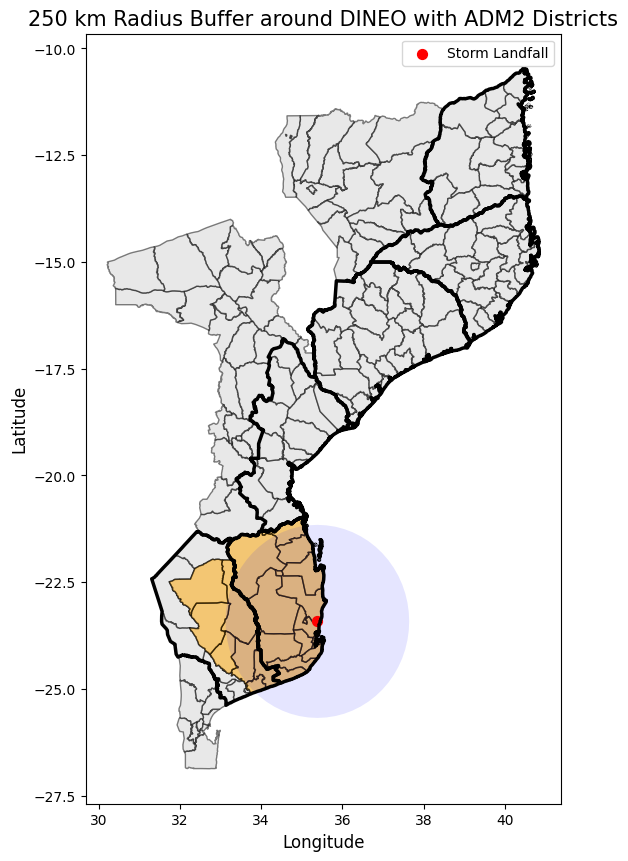

In [23]:
storm_name = "DINEO"

fig, ax = plt.subplots(figsize=(8, 10))

gdf_adm2.plot(ax=ax, color="lightgray", edgecolor="black", alpha=0.5)

districts_within_buffer_specific = districts_within_buffer[
    districts_within_buffer["NAME"].isin(
        landfall_gdf[landfall_gdf["NAME"] == storm_name]["NAME"]
    )
]

districts_within_buffer_specific[
    districts_within_buffer_specific["ADM1_PT_left"].isin(constants.ADMS)
].plot(ax=ax, color="orange", edgecolor="black", alpha=0.5)

landfall_gdf_specific = landfall_gdf[landfall_gdf["NAME"] == storm_name]

landfall_gdf_specific.set_geometry("buffer").plot(
    ax=ax, color="blue", alpha=0.1
)

landfall_gdf_specific.plot(
    ax=ax, color="red", markersize=50, label="Storm Landfall"
)

gdf_adm1_sel.plot(
    ax=ax, edgecolor="black", linewidth=2.5, facecolor="none"
)

plt.title(
    f"250 km Radius Buffer around {storm_name} with ADM2 Districts",
    fontsize=15,
)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.legend()

plt.show()